In [4]:
from numpy import *
from scipy import signal
from scipy.integrate import quad
import TMQGP as tm
import tqdm.notebook as tqdm
from QuarkTM import Particle, Channel
import QuarkTM
import pickle
import matplotlib
-import pandas as pd

In [5]:
from syntax_sugar import pipe, END
from syntax_sugar import thread_syntax as t, process_syntax as p

NTHR = 14

In [6]:
matplotlib.style.use('publication')

In [7]:
# folderLO = './IntegrationE-7/TestDeltaInt_LO_G=(14.50,15.50)L=0.200MQ=0.60MG=1.80screen=0.020/'
# folder = './IntegrationE-7/TestDeltaInt_HI_G=(14.50,15.50)L=0.200MQ=0.60MG=1.80screen=0.020/'
# folder = 'output/SuppressGL1HI_Q_G=(14.50,15.50)L=0.200MQ=0.60MG=1.80screen=0.010/'
# folderHD = './IntegrationE-7/TestDeltaInt_XHI_G=(14.50,15.50)L=0.200MQ=0.60MG=1.80screen=0.020/'
folder

NameError: name 'folder' is not defined

In [22]:
Trange = [0.16, 0.2, 0.3, 0.4]
mQs = [0.6 , 0.57, 0.5 , 0.45]
mGs = array([1.4 , 1.3 , 1.15, 1.  ])

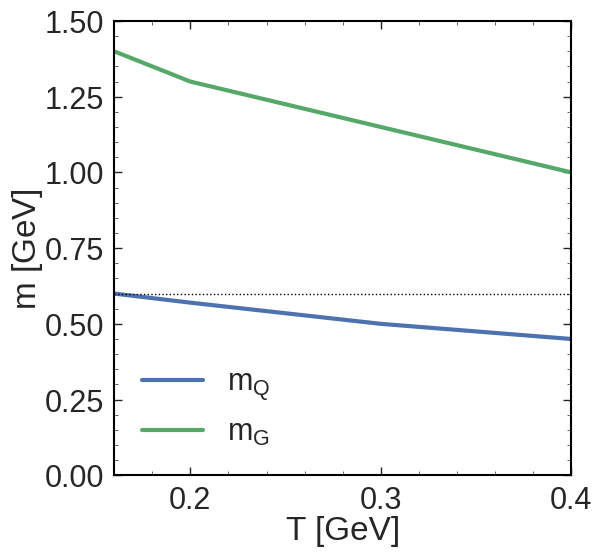

In [27]:
plt.plot(Trange, mQs, label=r'$m_Q$')
plt.plot(Trange, mGs, label=r'$m_G$')
plt.axhline(0.6, ls=':', lw=1, c='black')

plt.ylim(0, 1.5)

plt.ylabel(r'$m$ [GeV]')
plt.xlabel('T [GeV]')

plt.legend()
plt.savefig('mQ_fit.pdf', bbox_inches='tight')

In [ ]:
plt.plot()

In [8]:
T = 0.16

In [9]:
qrange = np.loadtxt(folder + 'qrange_T=%.3f.dat'%T)
erange = np.loadtxt(folder + 'erange_T=%.3f.dat'%T)

qrange_HD = np.loadtxt(folderHD + 'qrange_T=%.3f.dat'%T)
erange_HD = np.loadtxt(folderHD + 'erange_T=%.3f.dat'%T)

NameError: name 'folder' is not defined

In [21]:
Gtab_Q = np.loadtxt(folder + 'Q_G_T=%.3f.dat'%T, dtype=complex)
Gtab_Q_HD = np.loadtxt(folderHD + 'Q_G_T=%.3f.dat'%T, dtype=complex)

In [22]:
trange = array([0.16, 0.2, 0.3, 0.4, 0.5])

In [24]:
P_lo = pd.read_csv(folderLO + 'pressure.csv')
P_hi = pd.read_csv(folder + 'pressure.csv')
P_xhi = pd.read_csv(folderHD + 'pressure.csv')

In [34]:
colors = plt.rcParams['axes.color_cycle']

KeyError: 'axes.color_cycle'

[]

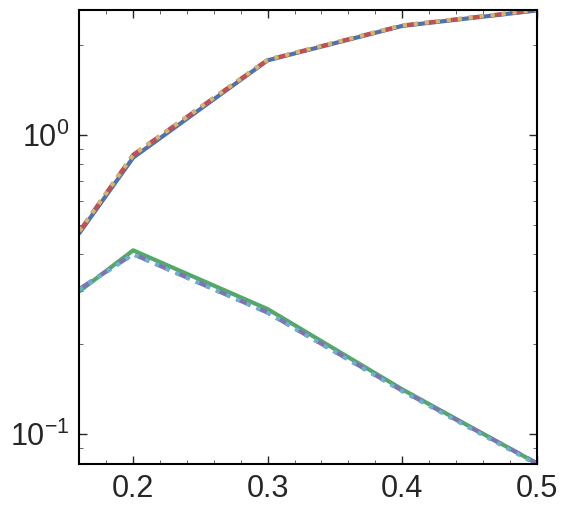

In [33]:
lss = ['-', '--', ':']
for P, ls in zip([P_lo, P_hi, P_xhi], lss):
    plt.plot(trange, (P.P_Q_Q + P.P_S_Q) / trange**4, ls=ls)
    plt.plot(trange, (P.P_Phi) / trange**4, ls=ls)
plt.semilogy()

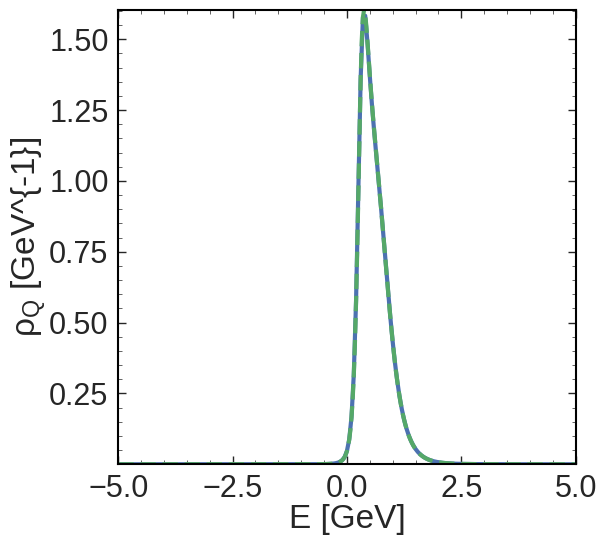

In [8]:
plt.plot(erange, -1/pi*imag(Gtab_Q[:, 0]))
plt.plot(erange_HD, -1/pi*imag(Gtab_Q_HD[:, 0]), ls='--')

plt.ylabel(r'$\rho_Q$ [GeV^{-1}]')

# plt.semilogy()
plt.xlabel('E [GeV]')

plt.savefig('rho_compare.pdf', bbox_inches='tight')

In [9]:
ch = 'qa1'
l = 0

In [10]:
x = np.loadtxt(folder + f'Q_X_{ch}_l=%i_T=%.3f.dat'%(l,T),
                           dtype=complex)

x_HD = np.loadtxt(folderHD + f'Q_X_{ch}_l=%i_T=%.3f.dat'%(l,T),
                           dtype=complex)

Text(0.5, 0, 'E [GeV]')

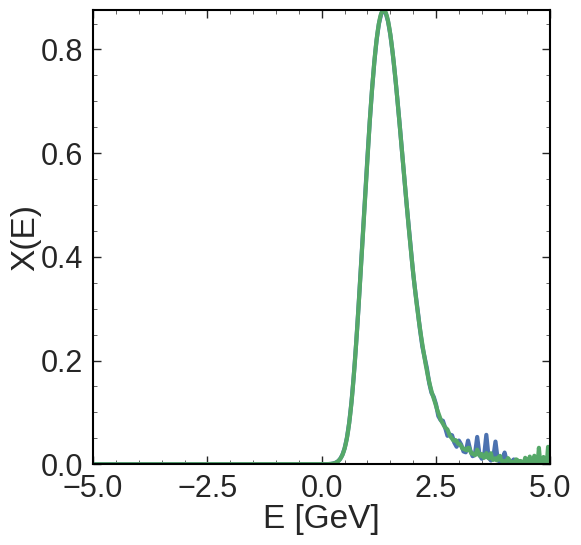

In [11]:
plt.plot(erange, imag(x[:, 0]))
plt.plot(erange_HD, imag(x_HD[:, 0]))

plt.ylabel('X(E)')
plt.xlabel('E [GeV]')
# plt.semilogy()

Single-channel test

In [12]:
l = 0
k = 'qa1'

In [13]:
v = np.loadtxt(folder + f'{k}_vq_l=%i_T=%.3f.dat'%(l, T))
ds, da, Fa = np.loadtxt(folder + f'{k}_weights')

_lt = (2*l + 1) * sign(v[1])*4*pi*ds * da / 6 * v**2 / x * log(1 - x)

In [14]:
v = np.loadtxt(folderHD + f'{k}_vq_l=%i_T=%.3f.dat'%(l, T))
ds, da, Fa = np.loadtxt(folderHD + f'{k}_weights')
_lt_hd = (2*l + 1) * sign(v[1])*4*pi*ds * da / 6 * v**2 / x_HD * log(1 - x_HD)

Text(0.5, 0, 'E [GeV]')

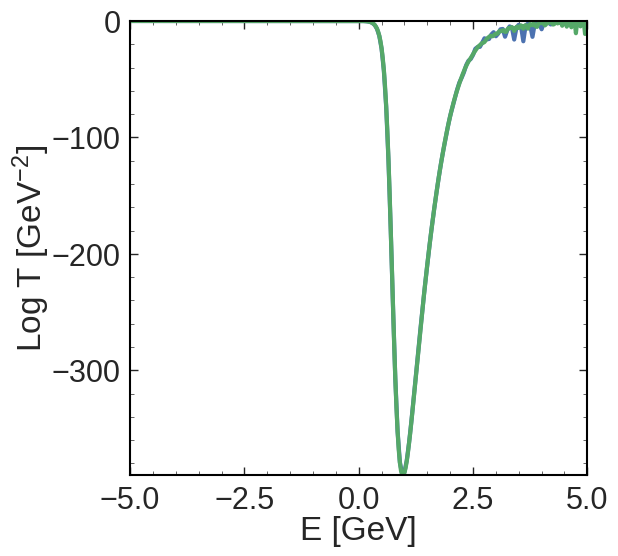

In [15]:
plt.plot(erange, imag(_lt[:, 0]))
plt.plot(erange_HD, imag(_lt_hd[:, 0]))

plt.ylabel('Log T [GeV$^{-2}$]')
plt.xlabel('E [GeV]')

In [16]:
Gtab_Q = np.loadtxt(folder + 'Q_G_T=%.3f.dat'%T, dtype=complex)
Gtab_Q_HD = np.loadtxt(folderHD + 'Q_G_T=%.3f.dat'%T, dtype=complex)

In [17]:
pQ = QuarkTM.Particle(0.6, qrange, erange, Gtab=Gtab_Q)
pQ_HD = QuarkTM.Particle(0.6, qrange_HD, erange_HD, Gtab=Gtab_Q_HD)

In [18]:
iImLT = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(_lt)))
iImLT_HD = tm.Interpolator2D(qrange_HD, erange_HD, ascontiguousarray(imag(_lt_hd)))


In [19]:
iEps1 = tm.Interpolator(qrange, pQ.om0(qrange), 'linear')
iEps1_HD = tm.Interpolator(qrange_HD, pQ_HD.om0(qrange_HD), 'linear')

In [20]:
ST = array([
            pipe(erange) | p[lambda z: tm.sigma_ff_onshell(z, q, T, iImLT, pQ.R, 
                                           iEps1, iEps1)] * NTHR | END
                    for q in tqdm.tqdm(qrange)])

  0%|          | 0/51 [00:00<?, ?it/s]


KeyboardInterrupt



In [ ]:
ST = ST.transpose()

In [ ]:
ST_HD = array([
            pipe(erange_HD) | p[lambda z: tm.sigma_ff_onshell(z, q, T, iImLT_HD, pQ_HD.R, 
                                           iEps1_HD, iEps1_HD)] * NTHR | END
                    for q in tqdm.tqdm(qrange_HD)])

In [ ]:
ST_HD = ST_HD.transpose()

ValueError: x and y must have same first dimension, but have shapes (401,) and (101,)

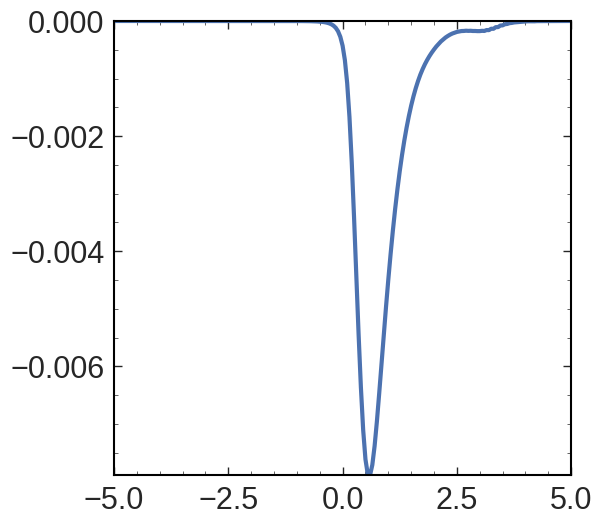

In [70]:
plt.plot(erange, ST[:, 0])
plt.plot(erange_HD, ST_HD[:, 0], ls=':')

## Explore the difference in integration

In [21]:
q = 0

In [22]:
st0 = array([tm.sigma_ff_onshell(z, q, T, iImLT_HD, pQ_HD.R, 
                                           iEps1_HD, iEps1_HD) for z in erange_HD])

In [23]:
st1 = array([tm.sigma_ff_onshell(z, q, T, iImLT_HD, pQ_HD.R, 
                                           iEps1, iEps1) for z in erange_HD])

In [24]:
st0_R = array([tm.sigma_ff_onshell(z, q, T, iImLT_HD, pQ.R, 
                                           iEps1_HD, iEps1_HD) for z in erange_HD])

In [25]:
st0_RE = array([tm.sigma_ff_onshell(z, q, T, iImLT_HD, pQ.R, 
                                           iEps1, iEps1) for z in erange_HD])

In [26]:
st0_RL = array([tm.sigma_ff_onshell(z, q, T, iImLT, pQ.R, 
                                           iEps1_HD, iEps1_HD) for z in erange_HD])

In [27]:
st_low = array([tm.sigma_ff_onshell(z, q, T, iImLT, pQ.R, 
                                           iEps1, iEps1) for z in erange_HD])

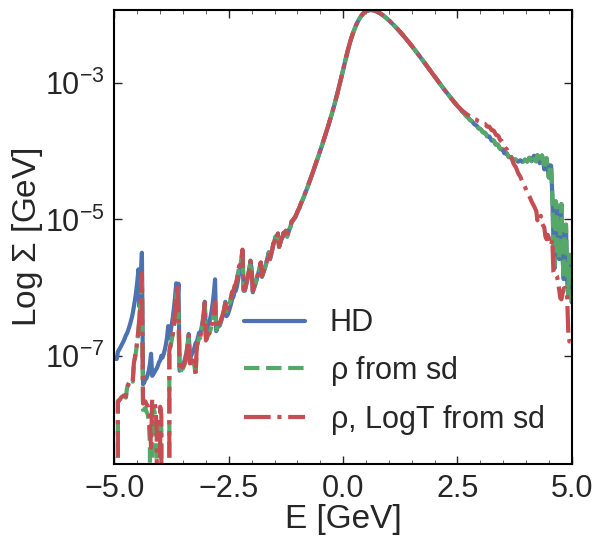

In [28]:
plt.plot(erange_HD, -st0, label='HD')
plt.plot(erange_HD, -st0_R, ls='--', label=r'$\rho$ from sd')
plt.plot(erange_HD, -st0_RL, ls='-.', label=r'$\rho$, LogT from sd')
# plt.plot(erange_HD, -st_low, ls=':')/
# plt.plot(erange, -ST[:, 0], ls=':')
plt.xlabel('E [GeV]')
plt.legend()

plt.ylabel(r'Log $\Sigma$ [GeV]')

plt.semilogy()

plt.savefig('LS_compare.pdf', bbox_inches='tight')

Is it interpolation or what?

In [79]:
R_resampled = pQ_HD.Rtab[::2,::2]

In [80]:
R_resampled.shape

(201, 51)

In [81]:
erange_res = erange_HD[::2]
qrange_res = qrange_HD[::2]

In [82]:
iR_res = tm.Interpolator2D(ascontiguousarray(qrange_res), ascontiguousarray(erange_res), ascontiguousarray(R_resampled))

In [83]:
st0_res = array([tm.sigma_ff_onshell(z, q, T, iImLT_HD, iR_res, 
                                           iEps1_HD, iEps1_HD) for z in erange_HD])

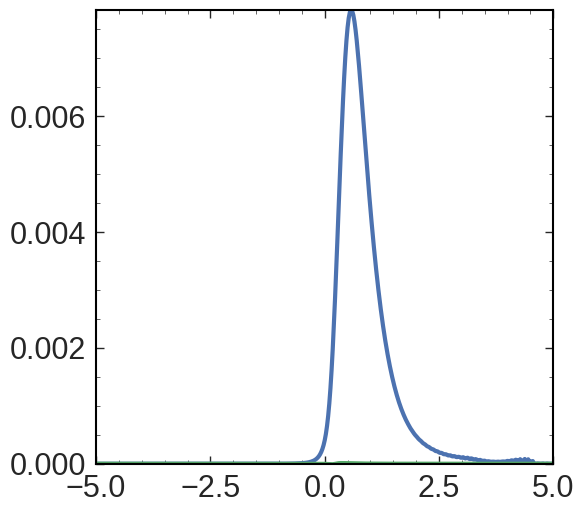

In [84]:
plt.plot(erange_HD, -st0)
plt.plot(erange_HD, -(st0_res -st0))
# plt.plot(erange, -ST[:, 0], ls=':')

# plt.semilogy()

# Quasiparticle pressure comparison

In [85]:
import pandas as pd